In [1]:
import numpyro
numpyro.set_platform('cpu')

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import jax.numpy as jnp

warnings.filterwarnings('ignore')

%matplotlib inline
sns.set_theme(context='paper', style='white', font_scale=1.6, color_codes=True)

In [3]:
def plot_performance(axes, results, num_epochs, ylims=[[.7, .95]]):
    for key in results:
        vals = results[key]
        if vals is not None:
            for ax, lbl in zip(axes, ['acc', 'ece', 'nll']):
                ax.plot(range(1, num_epochs + 1), vals[lbl], 'o:', label=key)

    for i, ylim in enumerate(ylims):
        axes[i].set_ylim(ylim)

def plot_compression(results, num_epochs, labels=['mlp', 'lenet', 'vit']):
    fig, axes = plt.subplots(1, len(labels), figsize=(16, 4), sharex=True, sharey=True)

    for i, label in enumerate(labels):
        try:
            for key in results[label]:
                vals = results[label][key]
                try:
                    axes[i].plot(range(1, num_epochs + 1), vals['zip'], 'o:', label=key)
                except:
                    pass
        except:
            pass

    for ax in axes:
        ax.set_xlabel('epoch')

    axes[0].set_ylabel('pruned fraction')
    axes[0].set_ylim([0, 1])
    for i, title in enumerate(['MLP', 'LeNet', 'ViT-T']):
        axes[i].set_title(title)

    axes[0].legend(title='method')
    fig.tight_layout()

    return fig

In [12]:
# load results
fm_results = jnp.load('../results/fashion_mnist.npz', allow_pickle=True)['results'].item()

# c10_results = jnp.load('../results/cifar10.npz', allow_pickle=True)['results'].item()

# c100_results = jnp.load('../results/cifar100.npz', allow_pickle=True)['results'].item()

num_epochs = 5

# Fashion MNIST

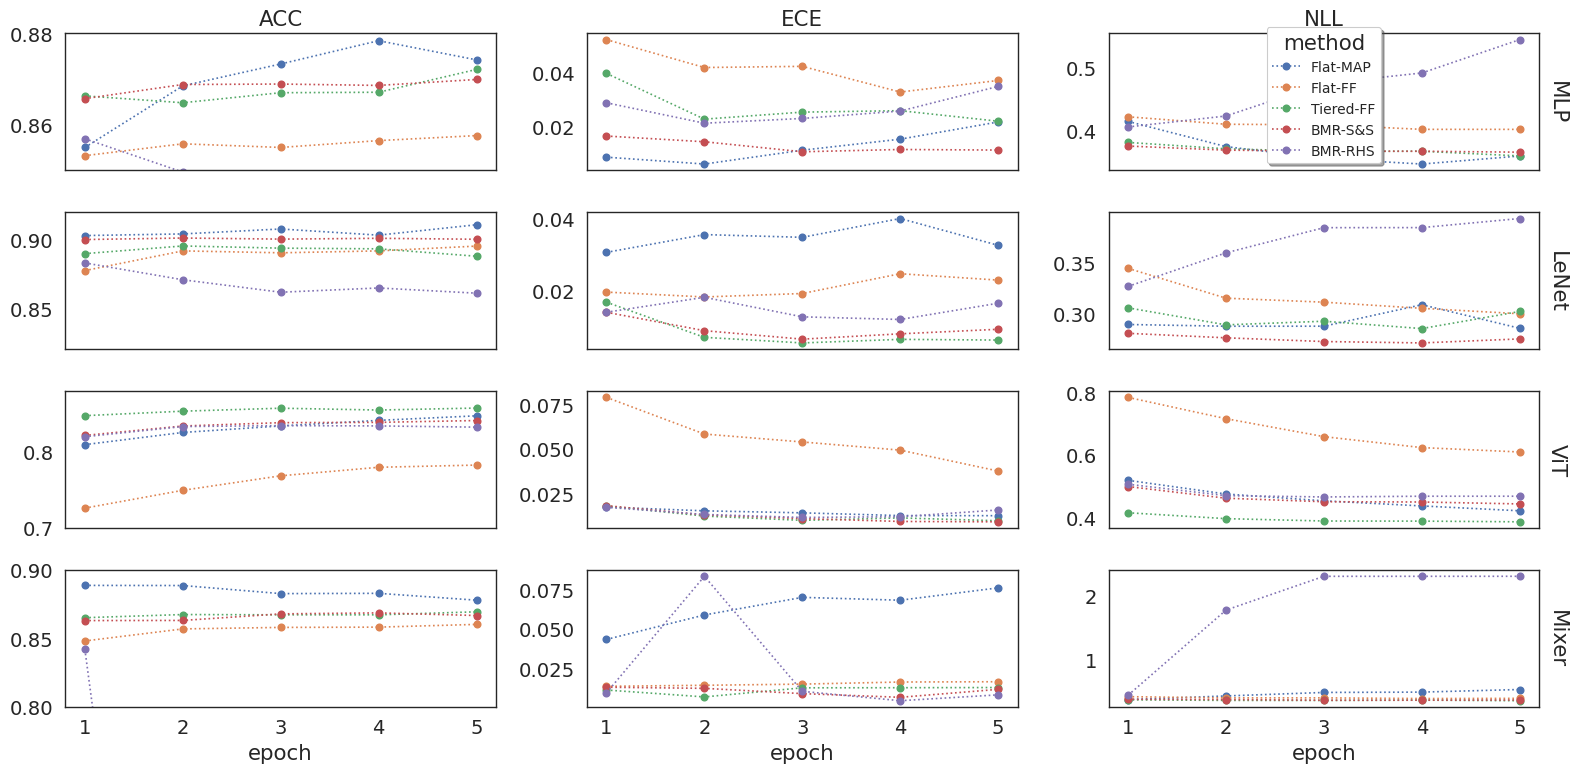

In [13]:
fig, axes = plt.subplots(4, 3, figsize=(16, 8), sharex=True)

plot_performance(axes[0], fm_results['mlp'], num_epochs, ylims=[[.85, .88]] );
plot_performance(axes[1], fm_results['lenet'], num_epochs, ylims=[[.82, .92]]);
plot_performance(axes[2], fm_results['vit'], num_epochs, ylims=[[.7, .88]]);
plot_performance(axes[3], fm_results['mixer'], num_epochs, ylims=[[.8, .9]]);


axes[0, -1].legend(loc=0, fancybox=True, shadow=True, title='method', fontsize=10)

for i, label in enumerate(['ACC', 'ECE', 'NLL']):
    axes[0, i].set_title(label)
    axes[-1, i].set_xlabel('epoch')

for i, label in enumerate(['MLP', 'LeNet', 'ViT', 'Mixer']):
    axes[i, -1].text(1.04, 0.5, label, horizontalalignment='center',
    verticalalignment='center', rotation=-90, transform=axes[i, -1].transAxes)
    
fig.tight_layout()
fig.savefig('Fig1.pdf', bbox_inches='tight', transparent=True, dpi=300)

## Cifar10

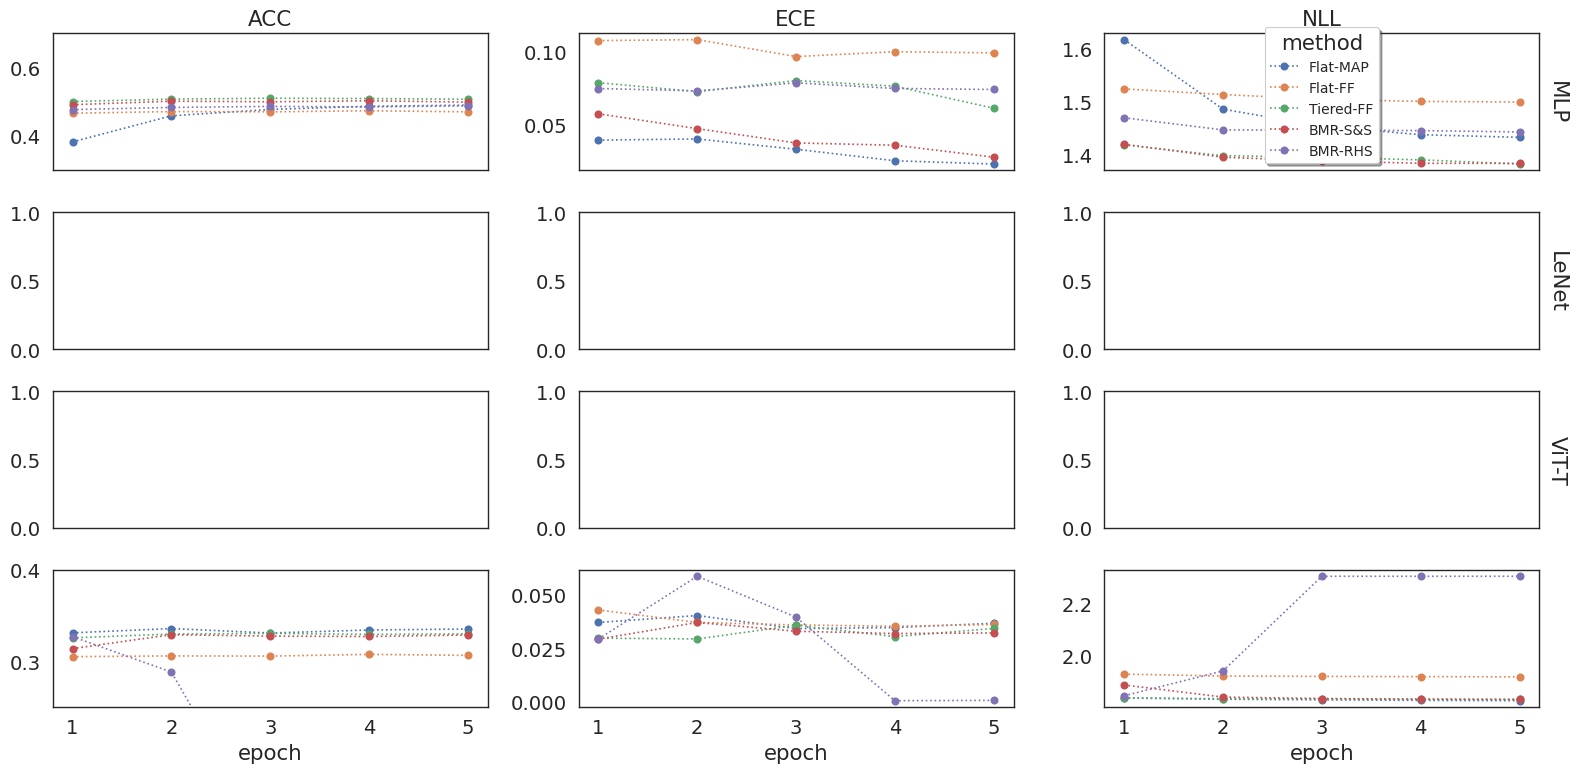

In [30]:
fig, axes = plt.subplots(4, 3, figsize=(16, 8), sharex=True)

plot_performance(axes[0], c10_results['mlp'], num_epochs, ylims=[[.3, .7]]);
# plot_performance(axes[1], c10_results['lenet'], num_epochs, ylims=[[.5, .8]]);
# plot_performance(axes[2], c10_results['vit'], num_epochs, ylims=[[.3, .55]]);
plot_performance(axes[3], c10_results['mixer'], num_epochs, ylims=[[.25, .4]]);


axes[0, -1].legend(loc=0, fancybox=True, shadow=True, title='method', fontsize=10)

for i, label in enumerate(['ACC', 'ECE', 'NLL']):
    axes[0, i].set_title(label)
    axes[-1, i].set_xlabel('epoch')

for i, label in enumerate(['MLP', 'LeNet', 'ViT-T']):
    axes[i, -1].text(1.04, 0.5, label, horizontalalignment='center',
    verticalalignment='center', rotation=-90, transform=axes[i, -1].transAxes)
    
fig.tight_layout()
# fig.savefig('Supp-Fig1.pdf', bbox_inches='tight', transparent=True, dpi=300)

# CIFAR 100

In [ ]:
fig, axes = plt.subplots(3, 3, figsize=(16, 8), sharex=True)

plot_performance(axes[0], cif100_results['mlp'], num_epochs, ylims=[[.85, .88]] );
plot_performance(axes[1], cif100_results['lenet'], num_epochs, ylims=[[.82, .92]]);
plot_performance(axes[2], cif100_results['vit'], num_epochs, ylims=[[.7, .88]]);

axes[0, -1].legend(loc=0, fancybox=True, shadow=True, title='method', fontsize=10)

for i, label in enumerate(['ACC', 'ECE', 'NLL']):
    axes[0, i].set_title(label)
    axes[-1, i].set_xlabel('epoch')

for i, label in enumerate(['MLP', 'LeNet', 'ViT-T']):
    axes[i, -1].text(1.04, 0.5, label, horizontalalignment='center',
    verticalalignment='center', rotation=-90, transform=axes[i, -1].transAxes)
    
fig.tight_layout()
# fig.savefig('Supp-Fig2.pdf', bbox_inches='tight', transparent=True, dpi=300)

# Compression

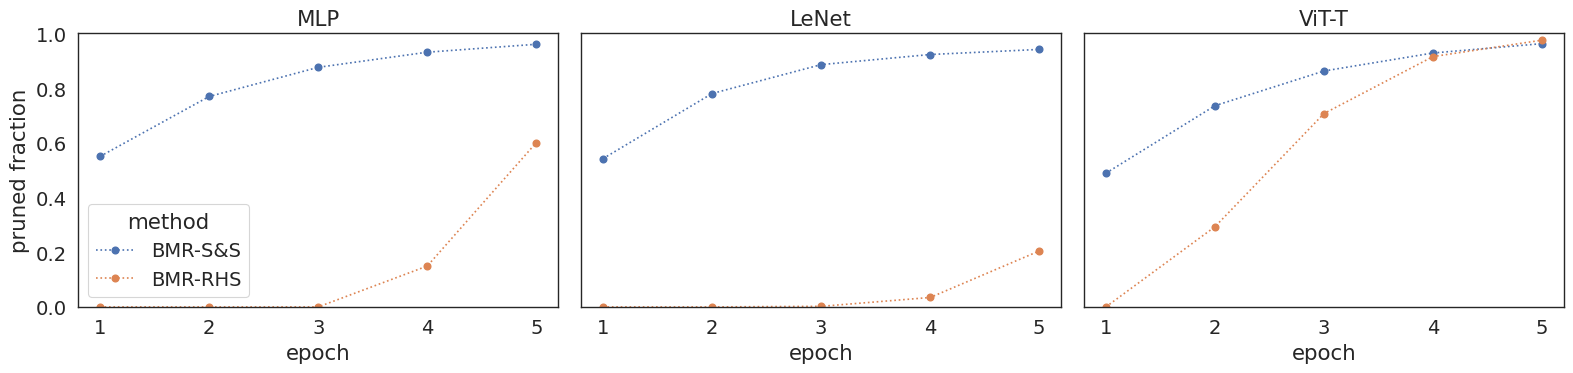

In [11]:
fig = plot_compression(fm_results, num_epochs);

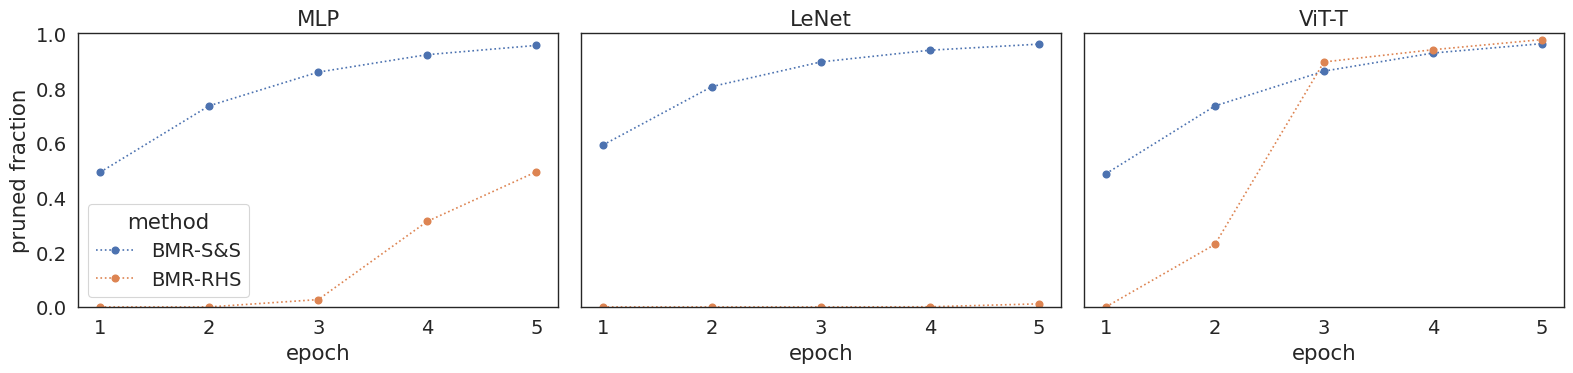

In [22]:
fig = plot_compression(c10_results, num_epochs);

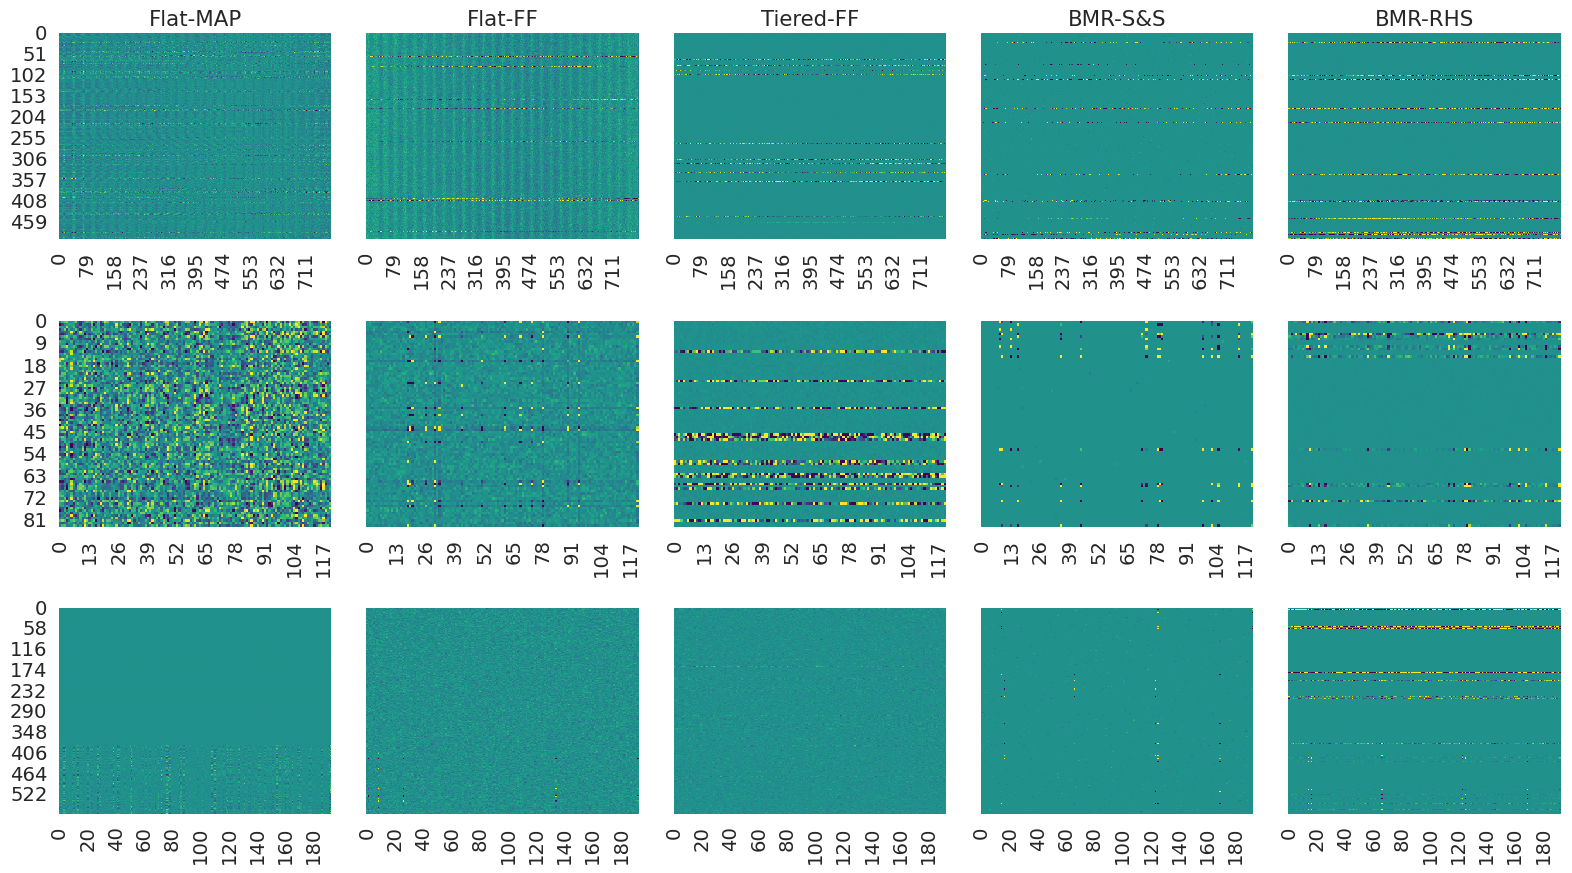

In [ ]:
fig, axes = plt.subplots(3, 5, figsize=(16, 9), sharex=False, sharey='row')

### mlp ###
l = 0
for key, ax in zip(fm_results['mlp'], axes[0]):

    sns.heatmap(fm_results['mlp'][key]['samples'][f'layer{l}.weight'].mean(0), cmap='viridis', ax=ax, vmax=.05, vmin=-.05, cbar=False)
    ax.set_title(key)

### lenet ###
l = 3
for key, ax in zip(fm_results['lenet'], axes[1]):

    sns.heatmap(fm_results['lenet'][key]['samples'][f'layer{l}.weight'].mean(0), cmap='viridis', ax=ax, vmax=.05, vmin=-.05, cbar=False)

### vit ###
l = 3
for key, ax in zip(fm_results['vit'], axes[2]):

    sns.heatmap(fm_results['vit'][key]['samples'][f'layer{l}.weight'].mean(0), cmap='viridis', ax=ax, vmax=.05, vmin=-.05, cbar=False)

fig.tight_layout()

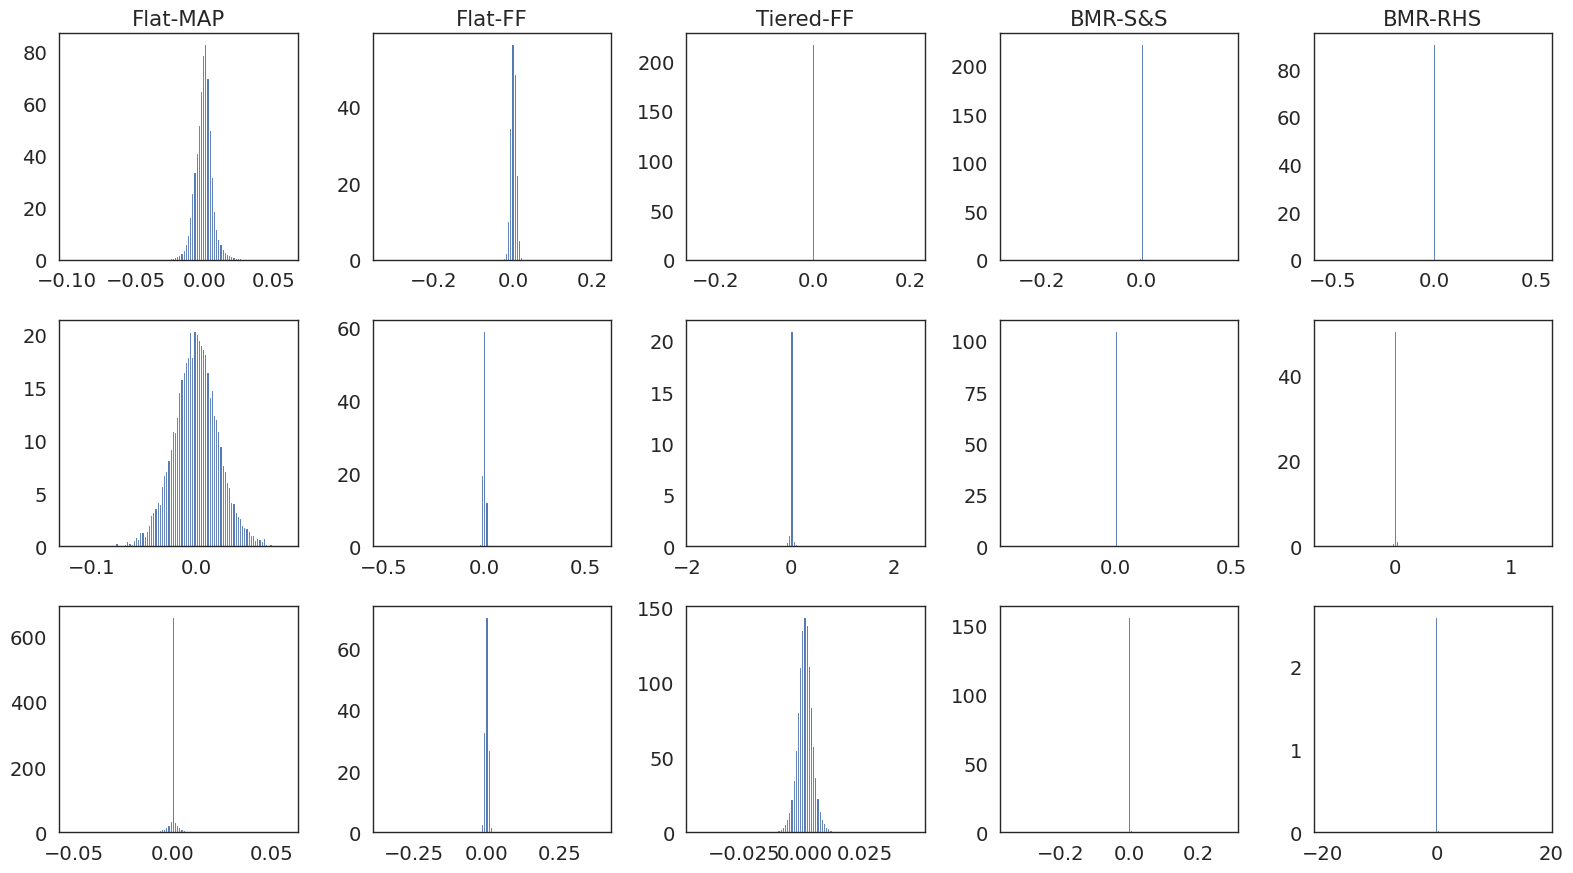

In [ ]:
fig, axes = plt.subplots(3, 5, figsize=(16, 9), sharex=False, sharey=False)

### mlp ###
l = 0
for key, ax in zip(fm_results['mlp'], axes[0]):

    weights = jnp.ravel(fm_results['mlp'][key]['samples'][f'layer{l}.weight'].mean(0))
    ax.hist(weights, bins=100, density=True)
    ax.set_title(key)

### lenet ###
l = 3
for key, ax in zip(fm_results['lenet'], axes[1]):

    weights = jnp.ravel(fm_results['lenet'][key]['samples'][f'layer{l}.weight'].mean(0))
    ax.hist(weights, bins=100, density=True)


### vit ###
l = 3
for key, ax in zip(fm_results['vit'], axes[2]):

    weights = jnp.ravel(fm_results['vit'][key]['samples'][f'layer{l}.weight'].mean(0))
    ax.hist(weights, bins=100, density=True)


fig.tight_layout()

In [ ]:
import jax.random as jr
from bmr4pml.nn import MLP, LeNet, VisionTransformer, resnet18

nnet = VisionTransformer(
        img_size = 32,
        patch_size = 8,
        in_chans = 1,
        num_classes = 10,
        embed_dim = 192,
        depth = 12,
        num_heads = 3,
        drop_rate = 0.0,
        attn_drop_rate = 0.0,
        drop_path_rate = 0.0,
        key = jr.PRNGKey(0)
    )

In [ ]:
nnet(jnp.zeros((1, 32, 32)), key=jr.PRNGKey(0))

Array([-0.36309278, -1.6437051 ,  0.17047209, -0.7685437 ,  1.3346447 ,
        0.11697998,  0.20842913, -0.9148797 , -0.9694005 , -0.35931683],      dtype=float32)